### We read in the data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np


day_hour_count = pd.read_csv("../data/bikeshare_hour_count.csv")
day_hour_count

,hour,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...,...
235,23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
236,23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
237,23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0
238,23.8,33.0,52.0,47.0,79.0,91.0,93.0,24.0


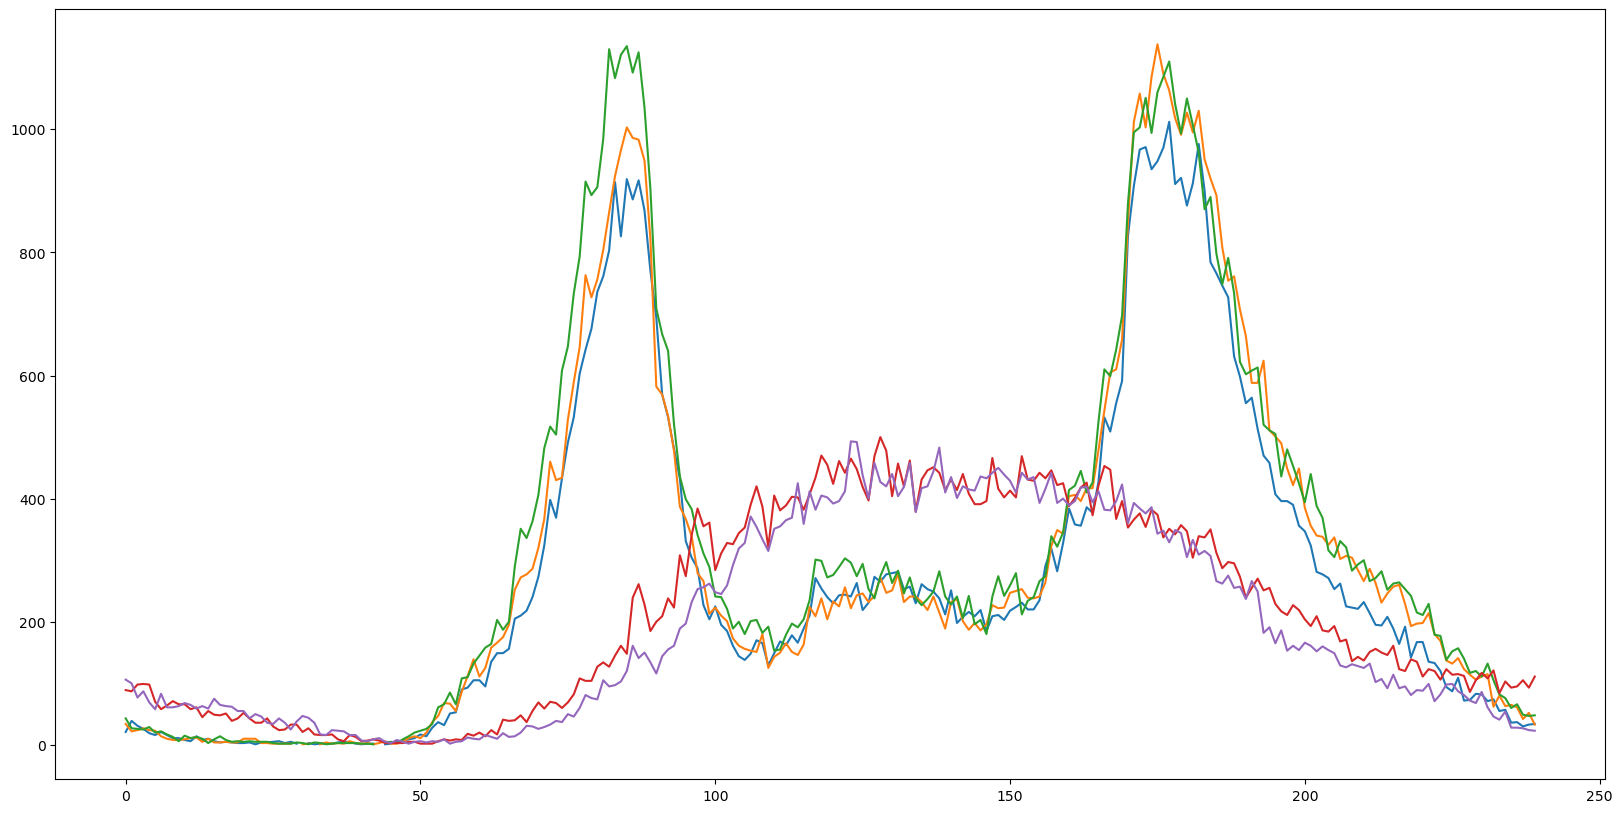

In [38]:
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count["monday"])
plt.plot(day_hour_count.index, day_hour_count["tuesday"])
plt.plot(day_hour_count.index, day_hour_count["wednesday"])
plt.plot(day_hour_count.index, day_hour_count["saturday"])
plt.plot(day_hour_count.index, day_hour_count["sunday"])

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# 1. Using the **`day_hour_count`** dataframe create 4 dataframes `monday`, `tuesday`, `saturday` and `sunday` that represent the data for those days. (hint: Monday is day=0)

In [41]:
monday = day_hour_count[["hour","monday"]].copy().fillna(0)
tuesday = day_hour_count[["hour", "tuesday"]].copy().fillna(0)
saturday = day_hour_count[["hour","saturday"]].copy().fillna(0)
sunday = day_hour_count[["hour", "sunday"]].copy().fillna(0)

In [43]:
pd.options.display.max_rows = 10
monday

,hour,monday
0,0.0,21.0
1,0.1,39.0
2,0.2,31.0
3,0.3,26.0
4,0.4,19.0
...,...,...
235,23.5,36.0
236,23.6,37.0
237,23.7,30.0
238,23.8,33.0


In [44]:
tuesday

,hour,tuesday
0,0.0,34.0
1,0.1,22.0
2,0.2,24.0
3,0.3,27.0
4,0.4,24.0
...,...,...
235,23.5,65.0
236,23.6,61.0
237,23.7,42.0
238,23.8,52.0


In [45]:
saturday

,hour,saturday
0,0.0,89.0
1,0.1,87.0
2,0.2,98.0
3,0.3,99.0
4,0.4,98.0
...,...,...
235,23.5,93.0
236,23.6,95.0
237,23.7,105.0
238,23.8,93.0


In [46]:
sunday

,hour,sunday
0,0.0,106.0
1,0.1,100.0
2,0.2,77.0
3,0.3,87.0
4,0.4,69.0
...,...,...
235,23.5,28.0
236,23.6,28.0
237,23.7,27.0
238,23.8,24.0



## 2a. Create 3 models fit to (`x=hour`, `y=monday`)  with varying polynomial degrees ( choose from `n=5,15,20`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, metrics

ploy5 = PolynomialFeatures(degree=5)
ploy15 = PolynomialFeatures(degree=15)
ploy20 = PolynomialFeatures(degree=20)

In [56]:
mon_y = monday["monday"].values

mon_5 = ploy5.fit_transform(monday["hour"].values.reshape(-1,1))
mon_15 = ploy15.fit_transform(monday["hour"].values.reshape(-1,1))
mon_20 = ploy20.fit_transform(monday["hour"].values.reshape(-1,1))

In [57]:
mon5_linear = linear_model.LinearRegression()
mon5_linear.fit(mon_5, mon_y)
(mon5_linear.coef_, mon5_linear.intercept_)

mon15_linear = linear_model.LinearRegression()
mon15_linear.fit(mon_15, mon_y)
(mon15_linear.coef_, mon15_linear.intercept_)

mon20_linear = linear_model.LinearRegression()
mon20_linear.fit(mon_20, mon_y)
(mon20_linear.coef_, mon20_linear.intercept_)

(array([ 0.00000000e+00, -7.60005861e-15, -5.37605225e-18,  1.28322334e-19,
        -6.08160851e-21, -7.15487169e-20, -7.82024458e-19, -8.17907992e-18,
        -8.11179617e-17, -7.52137094e-16, -6.38242518e-15, -4.79487842e-14,
        -3.01538420e-13, -1.42252461e-12, -3.75587593e-12,  9.95941334e-13,
        -1.00452548e-13,  4.97175776e-15, -1.21685928e-16,  1.18526905e-18,
        -1.10957723e-22]),
 204.00693152844906)

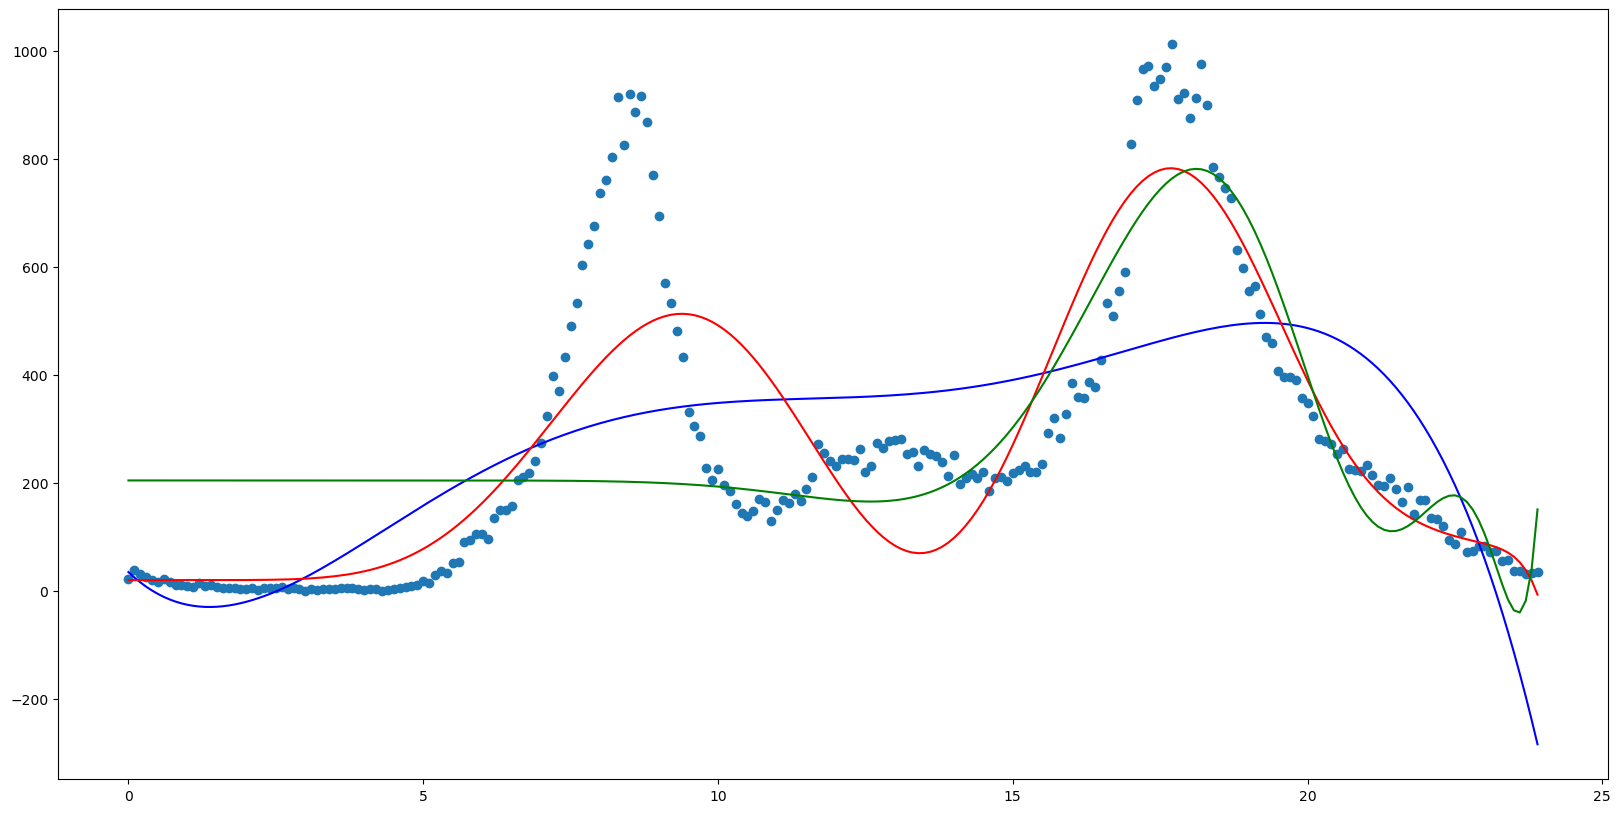

In [58]:
plt.scatter(monday["hour"], monday["monday"])
plt.plot(monday["hour"].values, mon5_linear.predict(mon_5), c='b')
plt.plot(monday["hour"].values, mon15_linear.predict(mon_15), c='r')
plt.plot(monday["hour"].values, mon20_linear.predict(mon_20), c='g')

## 2b. Repeat `2a` for `saturday`

In [59]:
sat_y = saturday["saturday"].values

sat_5 = poly5.fit_transform(saturday["hour"].values.reshape(-1,1))
sat_15 = poly15.fit_transform(saturday["hour"].values.reshape(-1,1))
sat_20 = poly20.fit_transform(saturday["hour"].values.reshape(-1,1))

In [60]:
sat5_linear = linear_model.LinearRegression()
sat5_linear.fit(sat_5, sat_y)
(sat5_linear.coef_, sat5_linear.intercept_)

sat15_linear = linear_model.LinearRegression()
sat15_linear.fit(sat_15, sat_y)
(sat15_linear.coef_, sat15_linear.intercept_)

sat20_linear = linear_model.LinearRegression()
sat20_linear.fit(sat_20, sat_y)
(sat20_linear.coef_, sat20_linear.intercept_)

(array([ 0.00000000e+00,  5.97741037e-14,  4.24197896e-17, -1.00946803e-18,
         4.78021581e-20,  5.62347279e-19,  6.14560305e-18,  6.42651223e-17,
         6.37226138e-16,  5.90673614e-15,  5.01025093e-14,  3.76170801e-13,
         2.36321538e-12,  1.11253461e-11,  2.91818709e-11, -9.00279962e-12,
         1.10626138e-12, -7.16110784e-14,  2.59156990e-15, -4.98138427e-17,
         3.97643442e-19]),
 96.67782335281373)

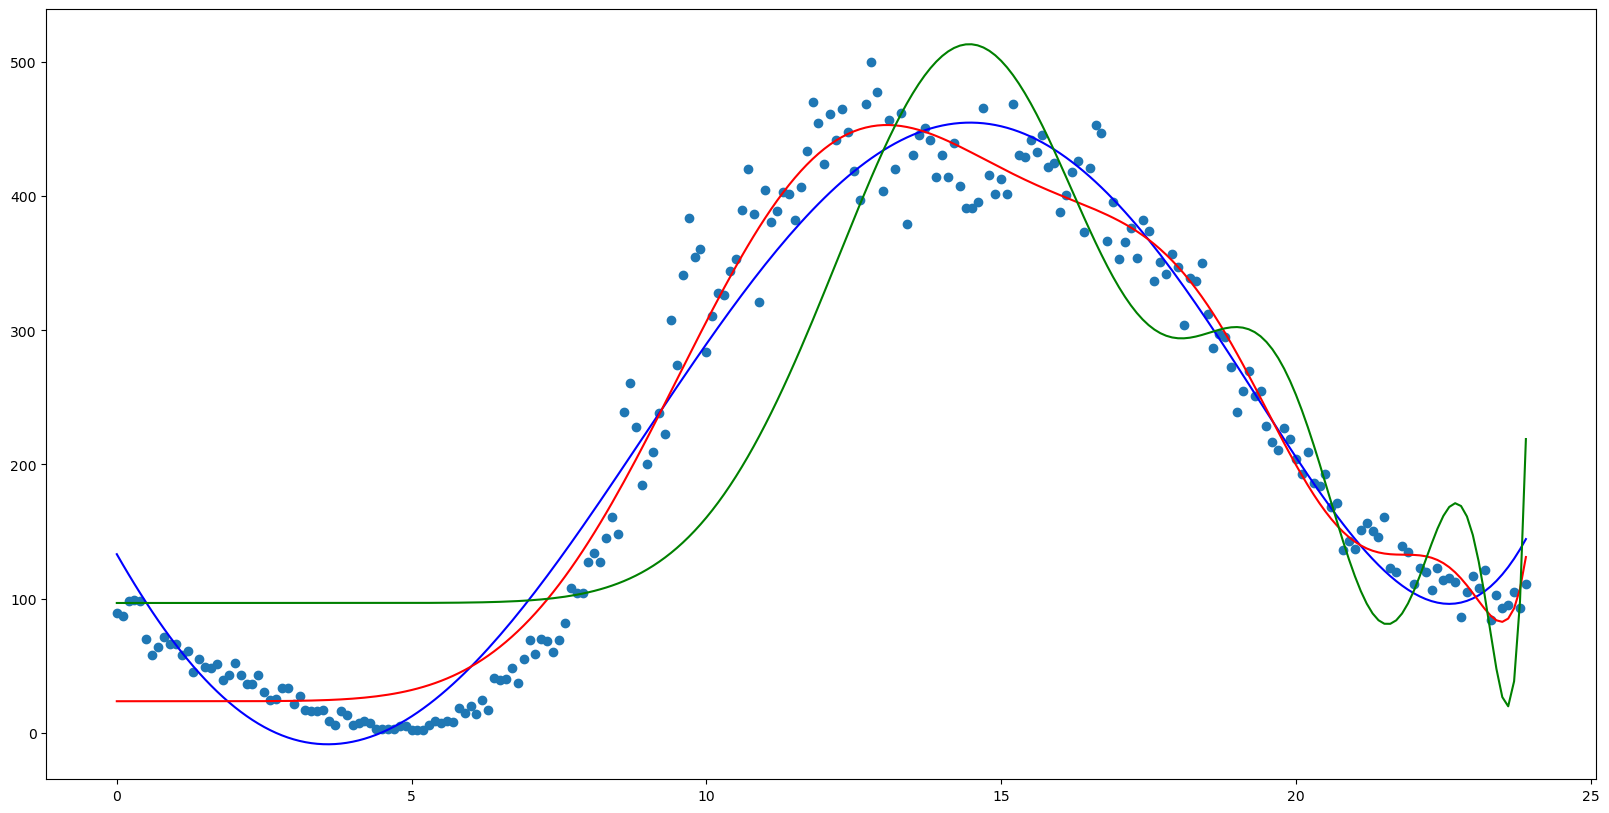

In [62]:
plt.scatter(saturday["hour"], saturday["saturday"])
plt.plot(saturday["hour"].values, sat5_linear.predict(sat_5), c='b')
plt.plot(saturday["hour"].values, sat15_linear.predict(sat_15), c='r')
plt.plot(saturday["hour"].values, sat20_linear.predict(sat_20), c='g')

## 3. Using the best `monday` model's prediction, determine the errors (MSE, MAE, MAPE) between the prediction with the `monday` and `tuesday` datasets

## Repeat for `saturday`/`sunday`


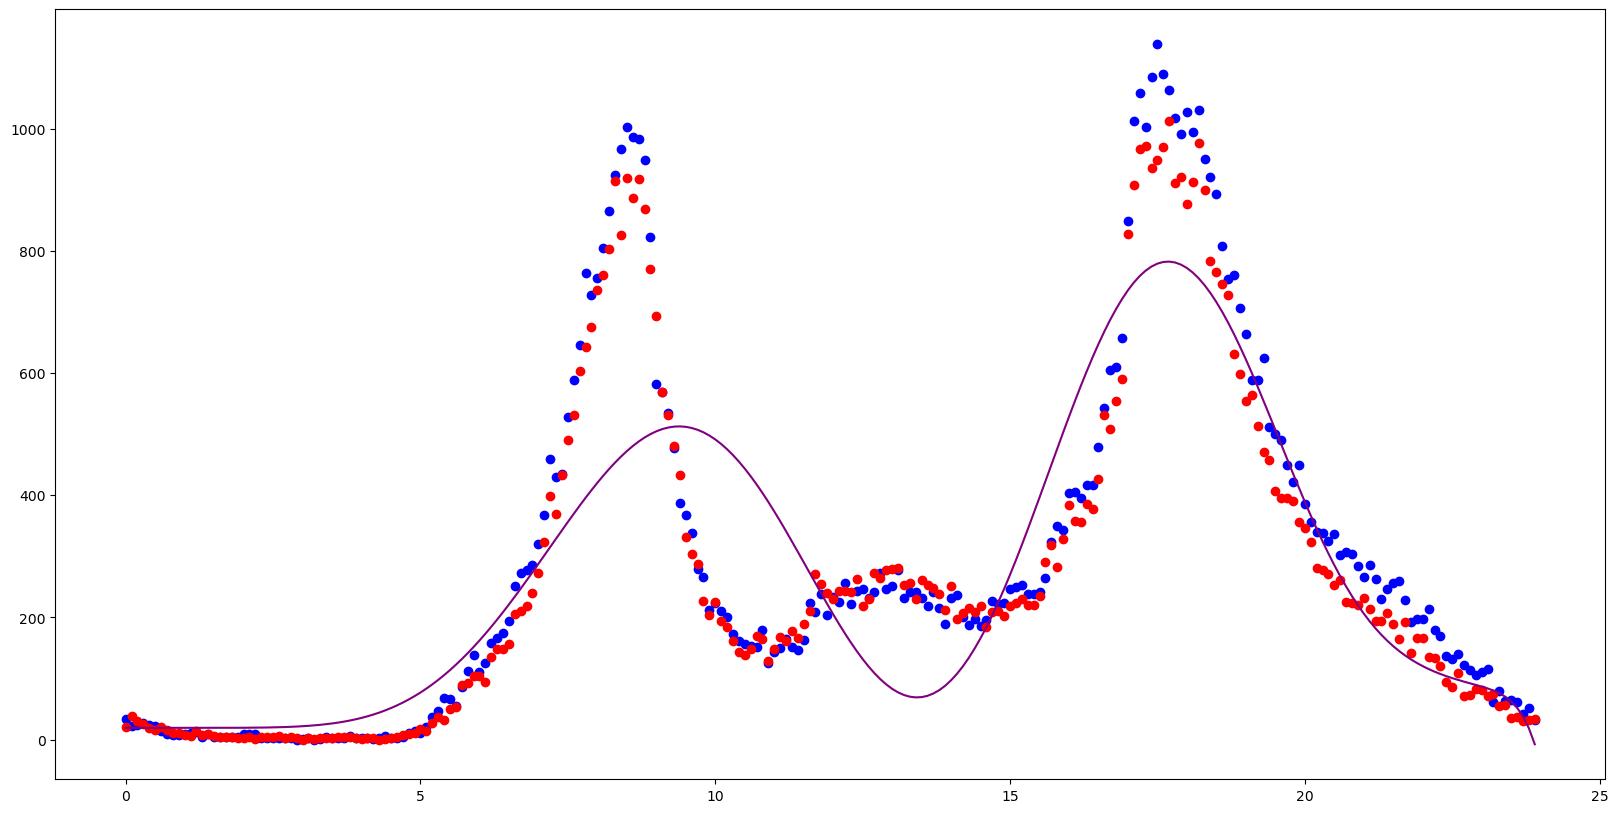

In [69]:
plt.scatter(tuesday["hour"], tuesday["tuesday"], c='b')
plt.scatter(monday["hour"], monday["monday"], c='r')
plt.plot(tuesday["hour"].values, mon15_linear.predict(mon_15), c='purple')

In [71]:
#Monday
(
    metrics.mean_squared_error(mon_y, mon15_linear.predict(mon_15)),
    metrics.mean_absolute_error(mon_y, mon15_linear.predict(mon_15)),
    metrics.mean_absolute_percentage_error(mon_y, mon15_linear.predict(mon_15))
)
### that's a pretty crazy error right there :p probably fair to say our best model here still isn't a good model

(19252.717262616054, 97.43996817297307, 1246240782405456.5)

In [72]:
#Tuesday (with Monday-trained model)
tue_y = tuesday["tuesday"].values
(
    metrics.mean_squared_error(tue_y, mon15_linear.predict(mon_15)),
    metrics.mean_absolute_error(tue_y, mon15_linear.predict(mon_15)),
    metrics.mean_absolute_percentage_error(tue_y, mon15_linear.predict(mon_15))
)


(23675.012546937018, 105.10936241856159, 843959696017067.6)

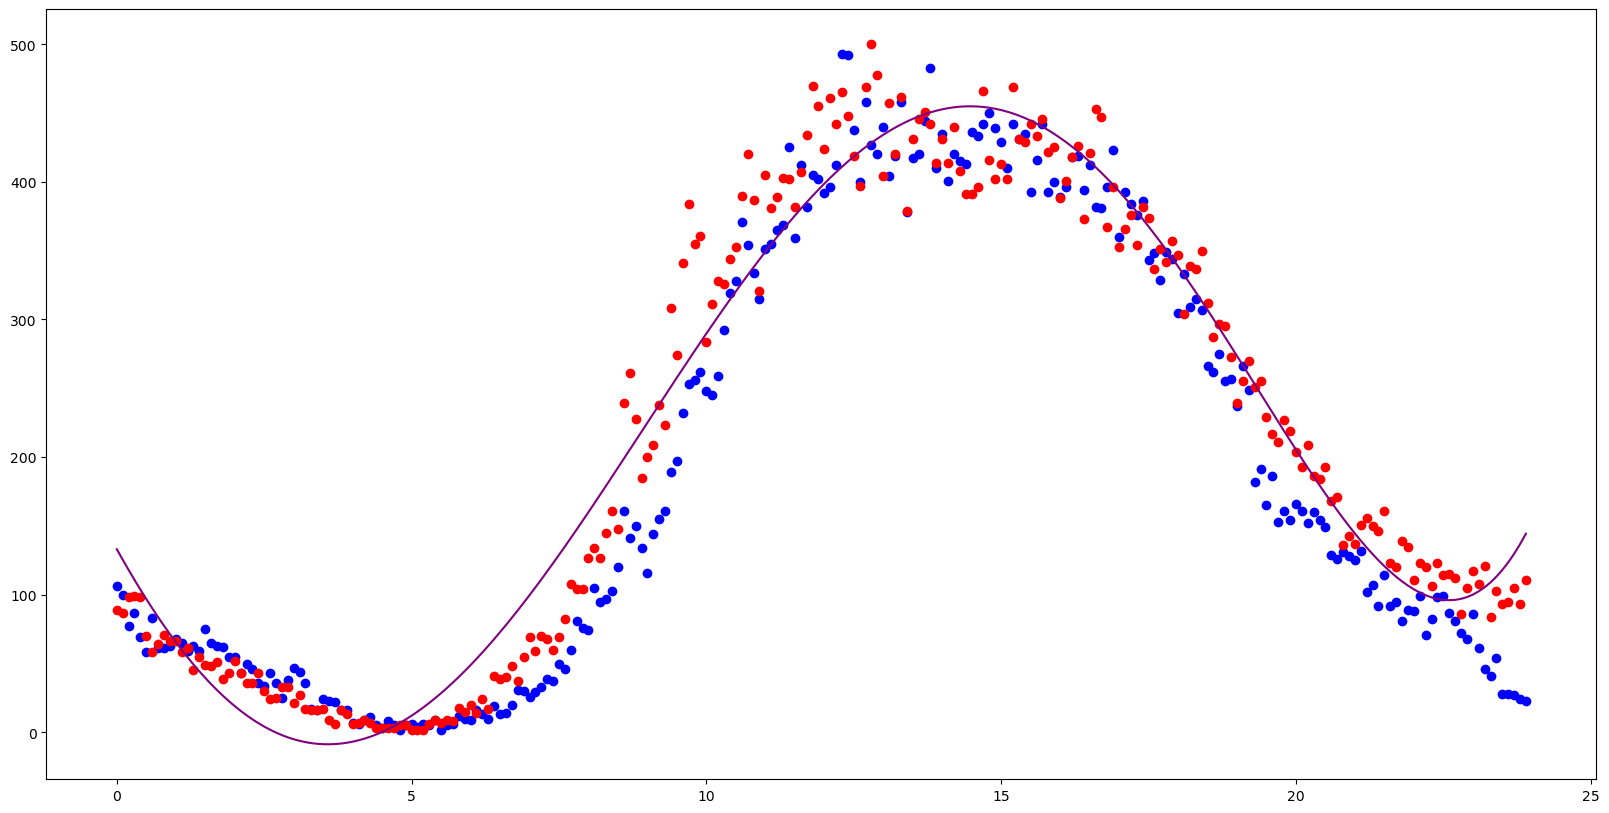

In [74]:
plt.scatter(sunday["hour"], sunday["sunday"], c='b')
plt.scatter(saturday["hour"], saturday["saturday"], c='r')
plt.plot(sunday["hour"].values, sat5_linear.predict(sat_5), c='purple')

In [75]:
#Saturday
(
    metrics.mean_squared_error(sat_y, sat5_linear.predict(sat_5)),
    metrics.mean_absolute_error(sat_y, sat5_linear.predict(sat_5)),
    metrics.mean_absolute_percentage_error(sat_y, sat5_linear.predict(sat_5))
)

(995.216704817103, 25.34716980052032, 0.4698986726675889)

In [76]:
#Sunday (with Saturday-trained model)
sun_y = sunday["sunday"].values
(
    metrics.mean_squared_error(sun_y, sat5_linear.predict(sat_5)),
    metrics.mean_absolute_error(sun_y, sat5_linear.predict(sat_5)),
    metrics.mean_absolute_percentage_error(sun_y, sat5_linear.predict(sat_5))
)

(1751.9785640598352, 33.09179943380377, 0.7723154684687809)

## 4. With `saturday`, use `train_test_split` to create training and test sets and build a model. Create predictions using the xtest from and determine the errors between these predictions and the ytest (MSE, MAE, MAPE).

In [149]:
from sklearn.model_selection import train_test_split
(satx_train, satx_test, saty_train, saty_test) = train_test_split(saturday["hour"].values, sat_y, test_size=.2)

In [161]:
sattest_linear = linear_model.LinearRegression()
sattest_linear.fit(satx_train.reshape(-1,1), saty_train)
(montest_linear.coef_, montest_linear.intercept_)

(array([11.86807285]), 129.62243687736557)

In [162]:
(
    metrics.mean_squared_error(saty_test, sattest_linear.predict(satx_test.reshape(-1,1))),
    metrics.mean_absolute_error(saty_test, sattest_linear.predict(satx_test.reshape(-1,1))),
    metrics.mean_absolute_percentage_error(saty_test, sattest_linear.predict(satx_test.reshape(-1,1)))
)

(21333.537003741145, 131.011816212979, 6.273506873532841)

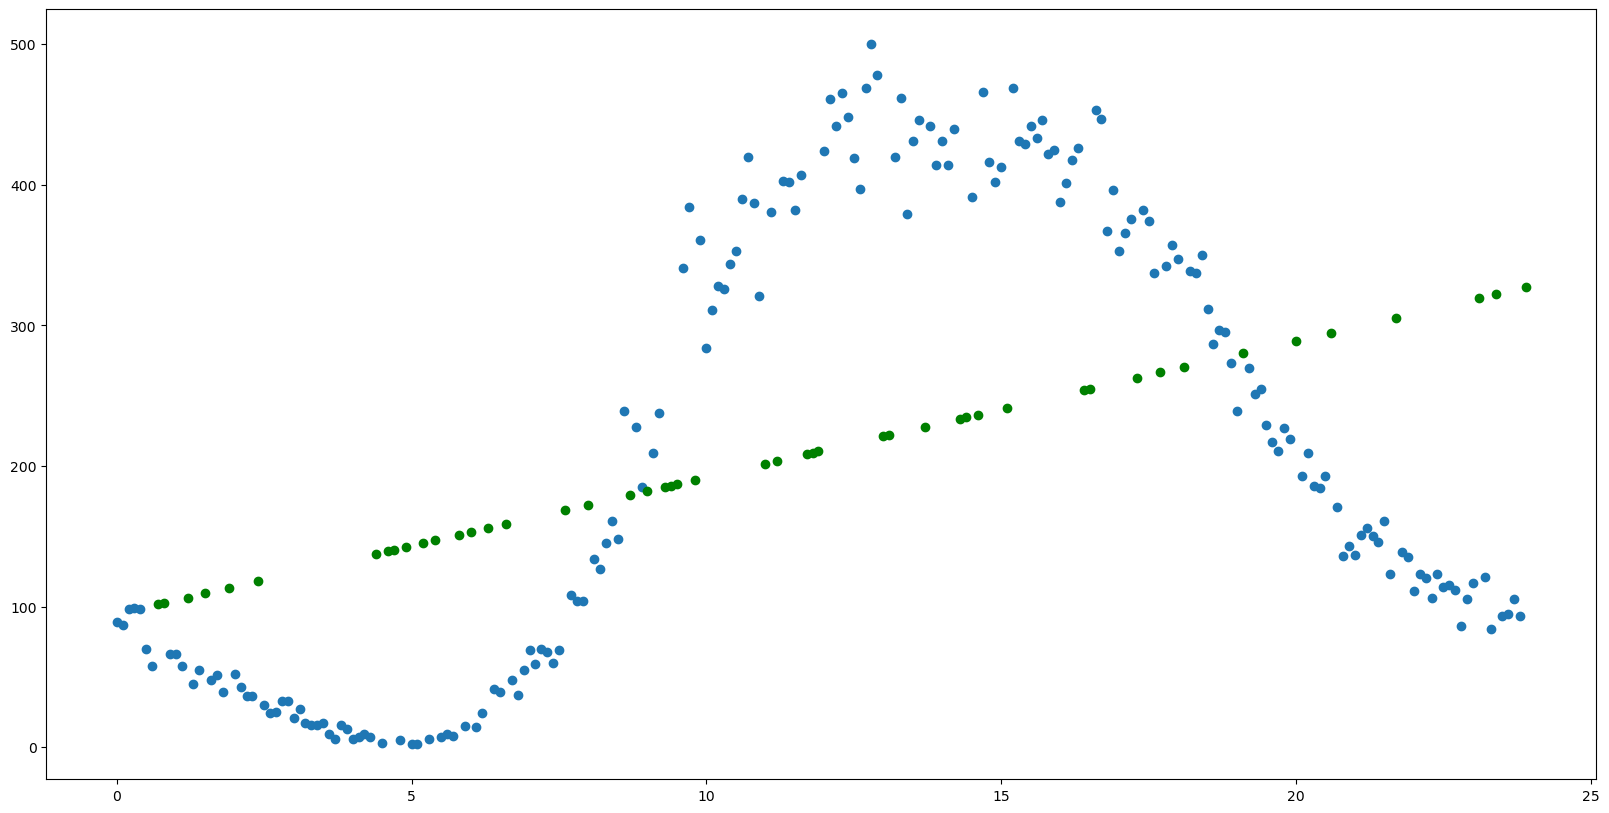

In [155]:
plt.scatter(satx_train, saty_train)
plt.scatter(satx_test, sattest_linear.predict(satx_test.reshape(-1,1)), c='g')

## repeat for `monday`

In [163]:
(monx_train, monx_test, mony_train, mony_test) = train_test_split(monday["hour"].values, mon_y, test_size=.2)

In [164]:
montest_linear = linear_model.LinearRegression()
montest_linear.fit(monx_train.reshape(-1,1), mony_train)
(montest_linear.coef_, montest_linear.intercept_)

(array([13.32748136]), 111.90308156323007)

In [165]:
(
    metrics.mean_squared_error(mony_test, montest_linear.predict(monx_test.reshape(-1,1))),
    metrics.mean_absolute_error(mony_test, montest_linear.predict(monx_test.reshape(-1,1))),
    metrics.mean_absolute_percentage_error(mony_test, montest_linear.predict(monx_test.reshape(-1,1)))
)

(67358.55989202078, 195.9808171065587, 1.4250658263834522e+16)

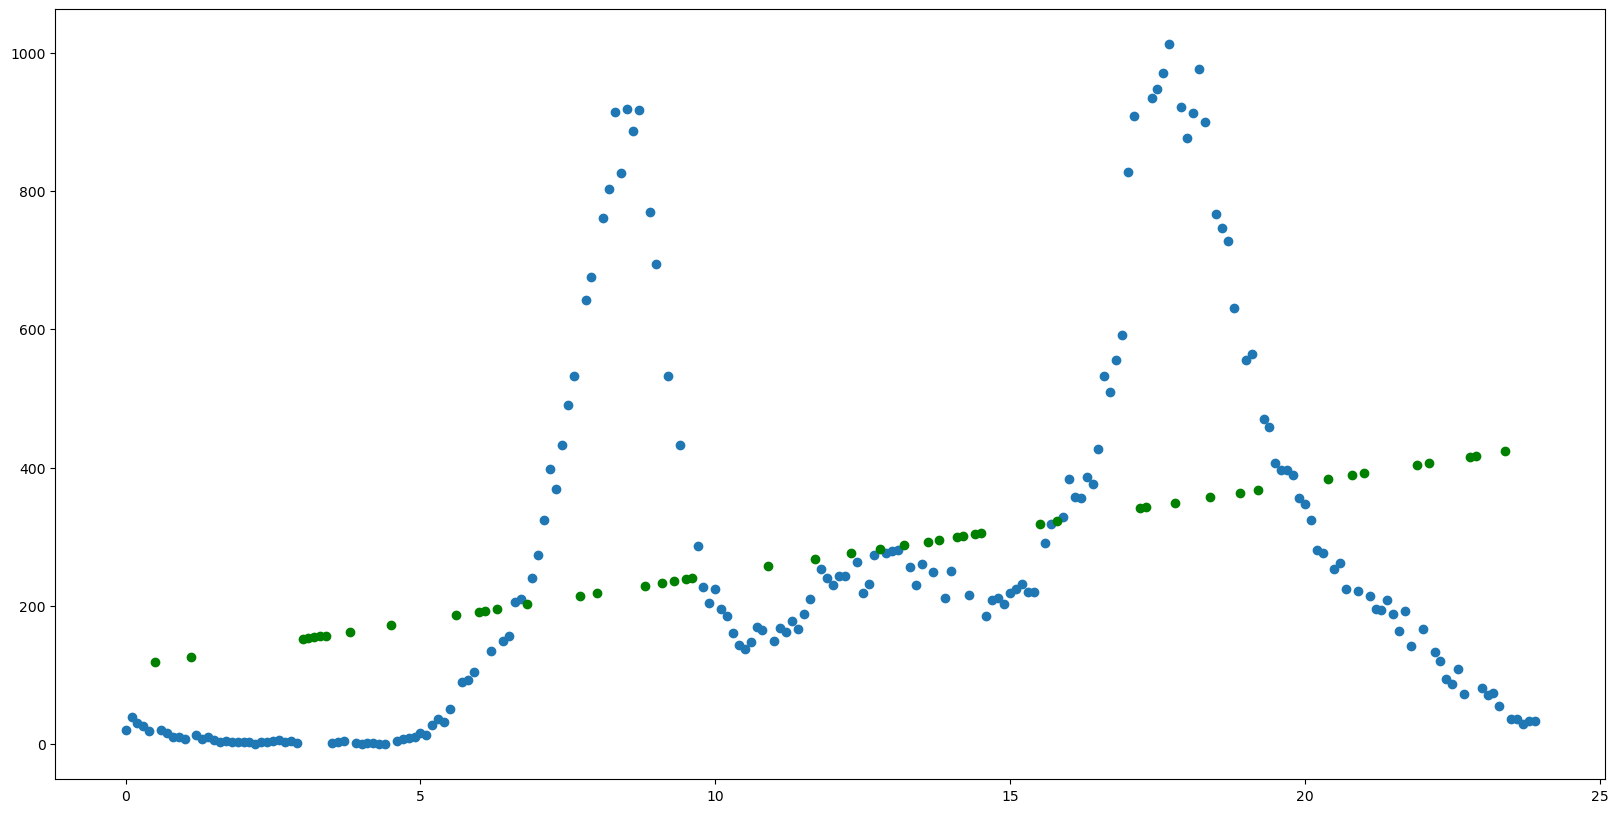

In [166]:
plt.scatter(monx_train, mony_train)
plt.scatter(monx_test, montest_linear.predict(monx_test.reshape(-1,1)), c='g')